## Adım 1: pdf içindeki tabloları bul

In [1]:
pip install tabula-py


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 62.0 MB/s eta 0:00:00


In [2]:
pip install jpype1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 22.7 MB/s eta 0:00:00


In [3]:
import tabula
import pandas as pd

# PDF dosyasının yolunu belirtin
pdf_path = '/content/350641_1.pdf'

# Tabloları oku
tables = tabula.read_pdf(pdf_path, pages='all', multiple_tables=True)

# Ayıklanan tabloları CSV dosyasına yazın veya işleyin
for i, table in enumerate(tables):
    print(f'Table {i}:\n{table}\n')

Table 0:
Empty DataFrame
and teamwork]
Index: []

Table 1:
Empty DataFrame
products and services]
Index: []

Table 2:
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

Table 3:
Empty DataFrame
• Active participation in Singapore Green Building Council]
Index: []

Table 4:
Empty DataFrame
• Engagement where appropriate with Singapore Exchange]
Index: []

Table 5:
Empty DataFrame
Capital.]
Index: []

Table 6:
Empty DataFrame
For more information, please refer to chapter on Environmental Capital.]
Index: []

Table 7:
Empty DataFrame
Human Capital, and Social and Relationship Capital.]
Index: []

Table 8:
      Unnamed: 0                                              Staff  \
0  Communication  •\rCode of Conduct Policy Suite\r• CapitaLand ...   

                                        Supply Chain  
0  •\rBribery and Corruption\rPrevention Policy\r...  

Table 9:
                     Global Principles  \
0  Marketing of Products\rand Services   

                            Ethical Business

## Adım 2: tablolar içindeki gri tabloları bul

In [4]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 50.0 MB/s eta 0:00:00


In [5]:
import fitz
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [6]:
Table1 =  f'''
GRI Content Index
GRI Standards Content Index for ‘In accordance’ – Core
The GRI Content Index references CapitaLand Limited Sustainability Report 2016 and the Annual Report 2016 (AR).
Disclosure Number Disclosure Title Page Reference
and Remarks
External
Assurance1
(pg 62-65)
General Disclosures 2016
102-1 Organisation’s name Introduction (pg 4)
102-2 Primary brands, products, and
services
Introduction (pg 1)
102-3 Location of headquarters Introduction (pg 4)
102-4 Location of operations AR (pg 2-3)
102-5 Ownership and legal form AR (pg7)
102-6 Markets served AR (pg 2-3, 73-78)
102-7 Scale of the organisation Introduction (pg 1, 3)
Financial Capital (pg 13)
AR (pg 2-3, 6, 66-78)
102-8 Workforce figures Human Capital (pg 40)
102-9 Organisation’s supply chain Environmental Capital (pg 20, 30-33)
Human Capital (pg 34, 37-39)
Social and Relationship Capital (pg 46, 48)
102-10 Significant changes during the
reporting period
AR (pg 12-13)
102-11 Report whether and how the
precautionary approach or principle
is addressed by the organisation
Introduction (pg 9)
Environmental Capital (pg 20-26)
102-12 List externally developed
economic, environmental and
social charters, principles, or
other initiatives to which the
organisation subscribes
Introduction (pg 3)
Organisational Capital (pg 14)
Human Capital (pg 40)
Social and Relationship Capital (pg 48)
102-13 Memberships of associations and
national or international advocacy
organisations
Introduction (pg 3)
Organisational Capital (pg 14)
Human Capital (pg 38)
Social and Relationship Capital (pg 48)
102-14 Statement from senior decisionmaker
President and Group CEO’s Message (pg
11-12 )
AR (pg 8-11)

102-15 Description of key impacts, risks,
and opportunities
Introduction (pg 9-10)
Organisational Capital (pg 18-19)
Environmental Capital (pg 20)
Human Capital (pg 34)
Social and Relationship Capital (46-48)
AR (24-54)
102-16 Organisation’s values, principles,
standards and norms of behaviour
Introduction (pg 1)
Organisational Capital (pg 14-17)
AR (pg 42)
102-18 Governance structure Introduction (pg 6)
AR (14-51, 63-64)
102-40 List of stakeholder groups Environmental Capital (pg 20)
Human Capital (pg 37-39, 45)
Social and Relationship Capital (pg 46-48)
'''

Table2 =  f'''
GRI Content Index
Disclosure Number Disclosure Title Page Reference
and Remarks
External
Assurance1
(pg 62-65)
General Disclosures 2016
102-41 Collective bargaining agreements Human Capital (pg 41)
102-42 Identifying and selecting
stakeholders
Environmental Capital (pg 20)
Human Capital (pg 37-39)
Social and Relationship Capital (pg 46-48)
102-43 Approach to stakeholder
engagement
Environmental Capital (pg 20)
Human Capital (pg 37-39, 45)
Social and Relationship Capital (pg 46-48)
102-44 Key topics and concerns raised
through stakeholder engagement
Environmental Capital (pg 20)
Human Capital (pg 37-39, 45)
Social and Relationship Capital (pg 46-48)
102-45 Entities included in the
organisation’s consolidated
financial statements
Introduction (pg 3)
102-46 Defining report content and topic
boundaries
Introduction (pg 6-7)
Social and Relationship Capital (pg 46)
102-47 List of material topics Introduction (pg 6-7)
Material Topics and Boundaries (pg 54)
102-48 Effect of any restatements of
information provided in previous
reports
There are some minor restatements of 2014
and 2015 total CO2 emissions and energy
usage. Environmental Capital (pg 29)
Revision of total volunteer service hours in
2014 and 2015 for consistency in year on
year comparison. Social and Relationship
Capital (pg 50)
102-49 Significant changes from previous
reports in the material topics and
boundaries
There are no significant changes from
previous reports.
102-50 Reporting period FY 1 January to 31 December 2016
Introduction (pg 3)
102-51 Date of previous report FY 1 January to 31 December 2015
102-52 Reporting cycle Introduction (pg 3)
102-53 Contact point Introduction (pg 4)
102-54 Claims of reporting in accordance
with GRI Standards
Introduction (pg 3)
102-55 GRI Content Index GRI Content Index (pg 55-59)
102-56 Assurance Introduction (pg 3-4)
Independent Assurance Statement
(pg 62-65)
Economic
Economic
Performance
201-1 Direct economic value generated
and distributed
Financial Capital (pg 13)
AR (pg 4, 66-72)
201-2 Financial implications, risks
and opportunities due to climate
change
Introduction (pg 9)
Environment (pg 20-21, 25-26)
Market Presence 202-2 Proportion of senior management
hired from local community
Human Capital (pg 40)
'''

Table3 =  f'''
GRI Content Index
Disclosure Number Disclosure Title Page Reference
and Remarks
External
Assurance1
(pg 62-65)
Economic
Indirect Economic
Impacts
203-1 Infrastructure investments and
services supported
Environmental Capital (pg 27, 33)
Social and Relationship Capital (pg 49-53)
Anti-Corruption 205-1 Risk assessment for corruption Organisational Capital (pg 15-18)
205-2 Communication and training
on anti-corruption policies and
procedures
Organisational Capital (pg 15-18)
205-3 Incidents and action taken Organisational Capital (pg 17)
Environment
Materials 301-1 Materials used by weight or
volume
Disclosure is not directly applicable as
building materials are purchased by builders
(main contractors). Weight of 10 materials
was collated for computation of embodied
carbon. Please see company approach on
how it encourages the use of recycled and/
or sustainable building materials on page 26
and 33.
Energy 302-1 Energy consumption within the
organisation
Environmental Capital (pg 29, 30-31)
302-2 Energy consumption outside of
the organisation
Environmental Capital (pg 30)
302-3 Energy intensity Environmental Capital (pg 29, 30)
302-4 Reduction of energy consumption Environmental Capital (pg 22, 27, 30-31)
302-5 Reductions in energy
requirements of products and
services
Environmental Capital (pg 22, 27)
Water 303-1 Total water consumption Environmental Capital (pg 29, 31)
303-2 Water sources significantly
affected
None during the reporting period
Environmental Capital (pg 25, 31)
303-3 Water recycled and reused Environmental Capital (pg 31)
Biodiversity 304-1 Operational sites in or adjacent to
protected areas or areas of high
biodiversity value
None during the reporting period.
Environmental Capital (pg 25)
304-2 Significant impact on biodiversity
304-4 IUCN Red List species and
national conservation list
species affected
Emissions 305-1 Direct (Scope 1) greenhouse gas
(GHG) emissions
Environmental Capital (pg 28-29)
305-2 Energy indirect (Scope 2) GHG
emissions
Environmental Capital (pg 28-29)
305-3 Other indirect (Scope 3) GHG
emissions
Environmental Capital (pg 28-30)
305-4 GHG emissions intensity Environmental Capital (pg 29, 30)
305-5 Reduction of GHG emissions Environmental Capital (pg 22, 30, 31)
'''

Table4 =  f'''
GRI Content Index
Disclosure Number Disclosure Title Page Reference
and Remarks
External
Assurance1
(pg 62-65)
Environment
Effluents
and Waste
306-1 Water discharge by quality and
destination
Wastewater is discharged into the public
sewerage system or sewage treatment
plant.
306-2 Waste management Environmental Capital (pg 32-33)
306-3 Significant spills None during the reporting period.
306-4 Transport of hazardous waste Disclosure is not applicable as the
Company does not transport, import, export
or treat hazardous waste.
306-5 Discharge and runoffs affecting
protected water bodies
None during the reporting period. Waste
water is discharged into the public
sewerage system or sewage treatment
plant.
Environmental Capital (pg 25)
Compliance 307-1 Non-compliance with
environmental laws and
regulations
One environmental non-compliance during
the reporting period.
Supplier
Environmental
Assessment
308-1 New suppliers screened using
environmental criteria
Environmental Capital (pg 22)
Social
Employment 401-1 New hires and employee turnover Human Capital (pg 40, 43, 44)
401-3 Parental leave Human Capital (pg 42)
Labour/
Management
Relations
402-1 Notice period regarding
operational changes
Human Capital (pg 43)
Occupational/
Health and Safety
403-1 Staff represented in OHS
committee
Human Capital (pg 34-37)
403-2 Occupational injury Human Capital (pg 36-37)
Training and/
Education
404-1 Average hours of training Human Capital (pg 43)
404-2 Employee skills upgrade and
transition
assistance programmes
Human Capital (pg 43)
404-3 Performance and career
development reviews
Human Capital (pg 42, 43)
Diversity and Equal
Opportunity
405-1 Diversity Human Capital (pg 40-41, 44)
405-2 Ratio of basic salary and
remuneration of women to men
Human Capital (pg 41, 44)
Non- discrimination 406-1 Incidents of discrimination and
corrective action taken
Human Capital (pg 40)
Child Labour 408-1 Operations and suppliers at
significant risk for incidents of
child labour and measures taken
to the effective abolition of child
labour
Human Capital (pg 40)
Social and Relationship Capital (pg 48)
'''

Table5 =  f'''
GRI Content Index
Disclosure Number Disclosure Title Page Reference
and Remarks
External
Assurance1
(pg 62-65)
Social
Forced or
Compulsory Labour
409-1 Operations and suppliers at
significant risk for incidents of
forced or compulsory labour, and
measures taken to eliminate it
Human Capital (pg 40)
Social and Relationship Capital (pg 48)
Human Rights
Assessment
412-1 Operations subjected to human
rights reviews
Human Capital (pg 34-37, 40, 41)
Social and Relationship Capital (pg 48)
Local Communities 413-1 Operations with local
community engagement, impact
assessments, and development
programmes
Environmental Capital (pg 25)
Human Capital (pg 37-39)
Social and Relationship Capital (pg 46-53)
Supplier Social
Assessment
414-1 Suppliers screened using social
criteria
Human Capital (pg 36, 38)
Public Policy 415-1 Political contributions Organisational Capital (pg 17)
Customer Health
and Safety
416-1 Health and safety impacts
assessment of products and
services
Human Capital (pg 34, 38)
Social and Relationship Capital (pg 51-52)
416-2 Incidents of non-compliance One non-compliance with local OHS laws
and regulations relating to a fire exit door.
Marketing
Communications
417-3 Incidents of non-compliance
concerning marketing
communications
No instances of non-compliance
with regulations and voluntary codes
concerning product and service information
and labeling during the reporting period.
Customer Privacy 418-1 Substantiated complaints
regarding breaches of customer
privacy and losses of customer
data
No instances on breaches of customer
privacy and loss of customer data during
the reporting period.
Socioeconomic
Compliance
419-1 Non-compliance with laws and
regulations in the social
and economic area
Some of the main contractors had a total
of six stop orders and five fines totalling
of S$50,000. Lessons learnt, if any, were
shared across the business units.
'''

###
Table6 =  f'''
United Nations Global Compact
10 Principles of the UN Global Compact
Principles Report Page
Human Rights
Principle 1 Businesses should support and respect the protection of internationally proclaimed
human rights
40
Principle 2 Make sure that they are not complicit in human rights abuses
Labour
Principle 3 Businesses should uphold the freedom of association and the effective recognition of the
right to collective bargaining
41
Principle 4 Elimination of all forms of forced and compulsory labour 40
Principle 5 Effective abolition of child labour
Principle 6 Elimination of discrimination in respect of employment and occupation
Environment
Principle 7 Businesses should support a precautionary approach to environmental challenges 20-33
Principle 8 Undertake initiatives to promote greater environmental responsibility
Principle 9 Encourage the development and diffusion of environmentally friendly technologies
Anti-corruption
Principle 10 Businesses should work against corruption in all its forms, including extortion and bribery 15-18
'''

Table7 = f'''
ISO 26000 Guidance on
Social Responsibility
Core Subjects Report Page
6.2 Organisational governance
The system by which an organisation makes and implements
decisions to achieve its objectives.
Introduction (pg 4-10),
Organisation Capital (pg 14-19),
Social and Relationship Capital (pg 46-48),
AR (pg 14-51)
6.3 Human rights
Respect for human rights including civil and political rights as
well as economic, social and cultural rights.
Human Capital (pg 34-45)
6.4 Labour practices
Policies and practices relating to work performed within, by or on
behalf of the organisation, including sub-contracted work.
Human Capital (pg 34-37, 40-45)
6.5 The environment
Environmental impact of an organisation’s decisions and
activities, such as use of resources, generation of pollution and
wastes.
Environmental Capital (pg 20-33)
6.6 Fair operating practices
Ethical conduct in dealings with other organisations such as
anti-corruption, socially responsible behaviour, fair competition
and respect for property rights.
Organisational Capital (pg 15-17),
Environmental Capital (pg 20, 22),
Human Capital (pg 37-39)
6.7 Consumer issues
Responsibilities to customers including having accurate, fair and
transparent marketing information and contractual processes,
as well as promoting sustainable consumption and designing
products that are accessible by all.
Organisational Capital (pg 17),
Environmental Capital (pg 20, 22, 24-27,
32-33),
Human Capital (pg 34-36),
Social and Relationship Capital (pg 51-52)
6.8 Community involvement and development
Support for and building relationship with the community, so as
to contribute to community development.
Human Capital (pg 34, 38, 41),
Social and Relationship Capital (pg 46-53)
'''

Table8 = f'''
Organisational Capital
CapitaLand Global Principles on Ethical Business Conduct
In pursuance of the Anti-Corruption Policy, CapitaLand has set four Global Principles on Ethical Business Conduct
which are implemented globally across all strategic business units.
Global Principles Ethical Business Conduct
Marketing of Products
and Services
•	Act with integrity and professionalism
•	Practise fair competition
•	Honour contractual commitments made
•	Do not make inaccurate or misleading statements
•	Do not offer or provide kickbacks or bribes
•	Do not contravene applicable laws and regulations
Offering of Business
Courtesies
•	Ensure necessary and justifiable for the occasion
•	Ensure appropriateness to local business customs and culture
•	Ensure reasonable monetary value or frequency
•	Do not cause embarrassment or adversely affect reputation of either party
•	Do not contravene applicable laws and regulations
Accepting Business
Courtesies
•	Ensure appropriateness to accept
•	Ensure no undue influence on business dealings
•	Ensure no conflict of interest
•	Declare business courtesies received
•	Do not accept frequent business courtesies from the same party
•	Do not cause embarrassment or adversely affect reputation of either party
•	Do not contravene applicable laws and regulations
Managing Business
Relationships
•	Act with integrity and professionalism
•	Make decisions/representation only when duly authorised
•	Exercise discretion over frequency and place of business activities
•	Maintain security and confidentiality of data and information used in business
interactions
•	Do not manipulate business relationship for personal gains and interests
•	Do not offer nor provide kickbacks or bribes
•	Do not ask for or accept kickbacks or bribes
•	Do not contravene applicable laws and regulations
'''

Table9 = f'''
Environmental Capital
Key Performance Indicators (KPIs) Tied to Remuneration
To measure its performance, CapitaLand has incorporated KPIs, most of which are linked to remuneration for its staff
including top management.
2016 Key Performance Indicators
Targets Performance
Environmental
Management
System (EMS)
ISO 14001 certification for its EMS
in all markets with investment
properties
Risk management of environmental
aspects and impacts
Retained ISO 14001 certification in 15 countries covering all
markets with investment properties
Having an annually audited EMS provides assurance to top
management and external investors on the company’s compliance
and alignment to best practices
Supply Chain
Management
All main contractors appointed
to be ISO 14001 certified
or, to comply fully with local
environmental laws and
regulations, annually audited by an
independent accredited assessor
•	 Six main contractors appointed in 2016 are ISO 14001 certified
Resource
Consumption
Management
All new development projects to
meet minimum green rating target set
•	Singapore – Green Mark
GoldPLUS award
•	Overseas – certification by a green
rating system administered by
a national government ministry/
agency or a WGBC recognised
Green Building Council; one level
higher than certification for iconic
projects1
Achieved
•	4 LEED, 19 Green Mark, 2 Green Building Evaluation Label2, 1 GBI3
Total of 148 green ratings achieved for its new development projects
and existing buildings – 110 Green Mark, 21 LEED, 9 Green Building
Evaluation Label, 2 Green Star, 2 CASBEE, 1 BREEAM, 1 DGNB, 1
GBI and 1 LEED (India)
Estimated energy and water reduction exceeding S$ 29 million (over
141,000 MWh/year and 1.2 million m3/year) from these projects4 , while
estimated carbon emission reduction is about 85 million kgCO2e/year
Five projects under development designed to harvest renewable
energy on-site
All existing buildings to achieve a
minimum green rating
•	Singapore – by 2020
•	Overseas – by 2030
92% of CapitaLand’s existing buildings in Singapore (by m2) has at
least a Green Mark Gold rating
39% of CapitaLand’s existing buildings overseas (by m2) has
achieved a green rating
Operational
Efficiency
0.5% energy reduction and 0.7%
water reduction per m2 (vs. 2015
for like-for-like set of properties)
Reduce carbon emissions intensity
by 23% by 2020, and 30% by 2030
Reduce energy intensity by 20%
by 2020, and 25% by 2030
Reduce water intensity by 20% by
2020, and 30% by 2030
(using 2008 as the base year)
0.6% and 1.2% increase in energy and water consumption per m2
(vs. 2015)
Reduced 3.6% carbon emissions intensity (vs. 2015)
Achieved 26.2% carbon emissions reduction, 18.8% energy reduction
and 21.8% water reduction per m2 (using 2008 as the base year)
Achieved cost avoidance in excess of S$108 million5 from utilities
savings since 2009 for its operational properties
Energy and water saving initiatives implemented in 2016 may lead
to an estimated reduction of 9,000 MWh (6 million kgCO2e) and
150,000 m3 of potable water per year.
Stakeholder
Engagement
Organise environmental outreach
activities to encourage a
environmental mindset among staff
and stakeholders
Over 280 CapitaLand properties participated in WWF Earth Hour,
pledging to go beyond the hour with year-long sustainable initiatives
Six stakeholder engagement awards were given out for encouraging
pro-active and creative stakeholder engagement initiatives.
'''

Table10 = f'''
Focus Initiatives
Consumption
Reduction
•	Natural ventilation to reduce air-conditioning demands
•	Sun shading, cool paints to reduce heat gain
•	Use of daylight, sun pipes/light shelves to reduce the need for artificial lighting
Energy Efficiency •	Equipment upgrade of indoor air-conditioning to more efficient ones
•	Lighting retrofits to more efficient types such as T5 with electronic ballast, LED (lightemitting diode)
•	Central procurement of LED to encourage the new technology usage
•	Conduct energy audits at properties to improve energy efficiency
Control, Metering
and Monitoring
•	Dimmers/ occupancy sensors/ daylight sensors
•	Sub-metering systems to provide detailed energy information
•	Building Management Systems
Renewable Energy •	Encourage use of renewable energy and purchase of green power
'''

In [7]:
# Örnek veriler (Bu kısıma kendi etiketlenmiş verilerinizi ekleyin)
data = [
    {"text": Table1, "label": "GRI_table"},
    {"text": Table2, "label": "GRI_table"},
    {"text": Table3, "label": "GRI_table"},
    {"text": Table4, "label": "GRI_table"},
    {"text": Table5, "label": "GRI_table"},

    {"text": Table6, "label": "not_GRI_table"},
    {"text": Table7, "label": "not_GRI_table"},
    {"text": Table8, "label": "not_GRI_table"},
    {"text": Table9, "label": "not_GRI_table"},
    {"text": Table10, "label": "not_GRI_table"},
    # Daha fazla etiketlenmiş veri ekleyin
]

# Eğitim verisini dataframe olarak oluşturun
df = pd.DataFrame(data)

In [8]:
df

,text,label
0,\nGRI Content Index\nGRI Standards Content Ind...,GRI_table
1,\nGRI Content Index\nDisclosure Number Disclos...,GRI_table
2,\nGRI Content Index\nDisclosure Number Disclos...,GRI_table
3,\nGRI Content Index\nDisclosure Number Disclos...,GRI_table
4,\nGRI Content Index\nDisclosure Number Disclos...,GRI_table
5,\nUnited Nations Global Compact\n10 Principles...,not_GRI_table
6,\nISO 26000 Guidance on\nSocial Responsibility...,not_GRI_table
7,\nOrganisational Capital\nCapitaLand Global Pr...,not_GRI_table
8,\nEnvironmental Capital\nKey Performance Indic...,not_GRI_table
9,\nFocus Initiatives\nConsumption\nReduction\n•...,not_GRI_table


In [9]:
# Özellik çıkarımı için CountVectorizer kullanın
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['label']

# Naive Bayes sınıflandırıcısını eğitin
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [10]:
def classify_table(table_text):
    # Tablonun GRI tablosu olup olmadığını sınıflandırın
    # Handle the case where table_text is a DataFrame
    if isinstance(table_text, pd.DataFrame):
        table_text = table_text.to_string()  # Convert DataFrame to string
    X_test = vectorizer.transform([table_text])
    prediction = model.predict(X_test)
    return prediction[0]


gri_tables = []
for table in tables:
    classification = classify_table(table)
    if classification == "GRI_table":
        print(f"GRI Table Found: {table}")
        gri_tables.append(table) # gri tables saved to gri_tables
    else:
        pass

GRI Table Found: Empty DataFrame
and teamwork]
Index: []
GRI Table Found: Empty DataFrame
products and services]
Index: []
GRI Table Found: Empty DataFrame
Columns: [Unnamed: 0]
Index: []
GRI Table Found: Empty DataFrame
Rainwater harvesting; condensate recovery; grey water recycling]
Index: []
GRI Table Found:    Unnamed: 0
0         NaN
GRI Table Found:    Unnamed: 0
0         NaN
GRI Table Found:    Unnamed: 0
0         NaN
GRI Table Found: Empty DataFrame
Columns: [Unnamed: 0]
Index: []
GRI Table Found: Empty DataFrame
Columns: [Unnamed: 0]
Index: []
GRI Table Found: Empty DataFrame
Columns: [Unnamed: 0]
Index: []
GRI Table Found: Empty DataFrame
Columns: [Unnamed: 0]
Index: []
GRI Table Found: Empty DataFrame
Columns: [Unnamed: 0]
Index: []
GRI Table Found:    Tender/contract specifications  Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0                             NaN         NaN         NaN         NaN   

   Unnamed: 3  Unnamed: 4  
0         NaN         NaN  
GRI Table Found:    Unna

## Evaluation Of Naive Bayes Model

Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0      1.0
1                   1.0     1.0       1.0      1.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0      2.0
weighted avg        1.0     1.0       1.0      2.0


Accuracy: 1.00




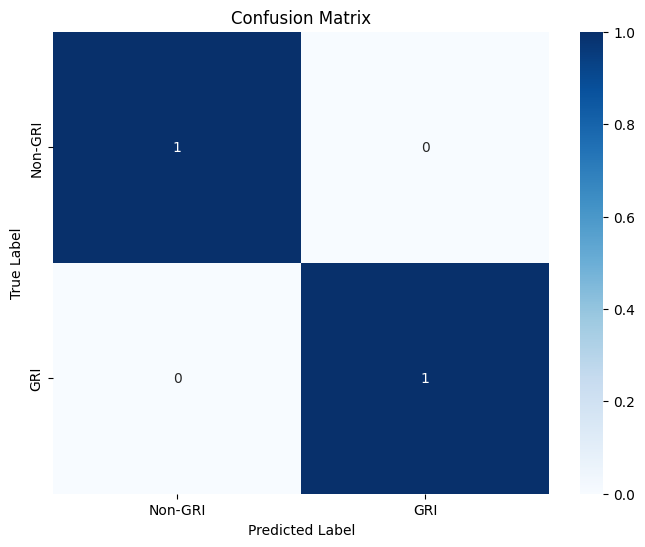

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd

# Sample data: list of table texts and their labels (1 for GRI, 0 for non-GRI)
table_texts = df['text'].tolist()
labels = df['label'].tolist()

# Convert table texts to strings
table_texts = [str(text) for text in table_texts]

# Convert labels to binary values (1 for GRI, 0 for non-GRI)
labels = [1 if label == "GRI_table" else 0 for label in labels]

# Vectorize the table texts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(table_texts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Classification Report:\n{report_df}\n\n")
print(f"Accuracy: {accuracy:.2f}\n\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-GRI', 'GRI'], yticklabels=['Non-GRI', 'GRI'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Bu çıktılar, Naive Bayes modelinizin performansını değerlendirirken elde edilen istatistiksel ölçümleri ve sonuçları gösterir.

### Classification Report
`Classification Report` modeli, farklı sınıfların (0 ve 1) tahmin performansını ölçer. Bu rapor dört ana ölçüm içerir: precision, recall, f1-score ve support.

- **Precision**: Tahmin edilen pozitif örneklerin kaçının gerçekten pozitif olduğunu gösterir.
  - Precision = TP / (TP + FP)
  - TP (True Positive): Doğru şekilde pozitif tahmin edilen örnekler.
  - FP (False Positive): Yanlış şekilde pozitif tahmin edilen örnekler.

- **Recall**: Gerçek pozitif örneklerin kaçının doğru şekilde tahmin edildiğini gösterir.
  - Recall = TP / (TP + FN)
  - FN (False Negative): Yanlış şekilde negatif tahmin edilen örnekler.

- **F1-score**: Precision ve recall'un harmonik ortalamasıdır. İkisi arasındaki dengeyi gösterir.
  - F1-score = 2 * (Precision * Recall) / (Precision + Recall)

- **Support**: Her sınıfın test setinde kaç örneğe sahip olduğunu gösterir.

Bu durumda, her iki sınıf (0 ve 1) için precision, recall ve f1-score değerleri 1.0'dır, yani modeliniz her iki sınıfı da mükemmel bir şekilde ayırt edebilmiştir.

- **Accuracy**: Tüm örnekler için genel doğruluk oranıdır.
  - Accuracy = (TP + TN) / (TP + TN + FP + FN)
  - TN (True Negative): Doğru şekilde negatif tahmin edilen örnekler.

- **Macro avg**: Tüm sınıflar için precision, recall ve f1-score'un ortalamasıdır.
- **Weighted avg**: Her sınıfın örnek sayısına göre ağırlıklandırılmış ortalamasıdır.

### Confusion Matrix
`Confusion Matrix` modeli, tahminlerin dağılımını gösterir. Her hücre şu anlama gelir:

- **[[1 0]**: Model 1 adet 0 sınıfını doğru şekilde tahmin etmiş (TN) ve 0 adet 1 sınıfını yanlış şekilde 0 sınıfı olarak tahmin etmiş (FP).
- ** [0 1]]**: Model 0 adet 0 sınıfını yanlış şekilde 1 sınıfı olarak tahmin etmiş (FN) ve 1 adet 1 sınıfını doğru şekilde tahmin etmiş (TP).

### Accuracy
`Accuracy`, modelin genel doğruluk oranını gösterir. Bu durumda, doğruluk oranı %100'dür (1.00), yani model test setindeki tüm örnekleri doğru şekilde sınıflandırmıştır.

### Sonuç
Bu sonuçlar, modelin şu anki veri setinde mükemmel bir performans gösterdiğini, tüm sınıfları doğru bir şekilde ayırt edebildiğini ve hiç yanlış tahmin yapmadığını gösterir. Ancak, bu sonuçlar yalnızca küçük bir veri setiyle test edildiğinden, modelin genel performansını değerlendirmek için daha büyük ve çeşitlendirilmiş bir veri seti kullanmak daha doğru olacaktır.

# Adım 3: GRI Tablolar içindeki satırlardan gri standard ve page reference bul

In [11]:
!pip install spacy

### NER Model oluştur

In [12]:
import spacy
from spacy.training.example import Example
from spacy.util import minibatch, compounding

# Load the pre-trained model
nlp = spacy.load("en_core_web_sm")


"""# Training a Custom NER Model"""

TRAIN_DATA = [
    ("G4-3 Report the name of the organization.. 43", {"entities": [(0, 4, "gri_standard"), (43, 45, "page_reference")]}),
    ("G4-4 Report the primary brands, products, and services. 26", {"entities": [(0, 4, "gri_standard"), (56, 58, "page_reference")]}),
    ("G4-8 Report the markets served (including geographic breakdown, sectors served, and types of customers and beneficiaries). 6", {"entities": [(0, 4, "gri_standard"), (123, 125, "page_reference")]}),
    ("G4-16 List memberships of associations (such as industry associations) and national or international advocacy organizations in which the organization is involved. 39). 6", {"entities": [(0, 5, "gri_standard"), (168, 169, "page_reference")]}),

    ("G4-1 CEO statement Letter to Stockhold-ers / p. 8 et seqq", {"entities": [(0, 4, "gri_standard"), (48, 49, "page_reference")]}),
    ("G4-3 Name of the organization Section 1 Structure /p. 54 et seqq.", {"entities": [(0, 4, "gri_standard"), (54, 56, "page_reference")]}),
    ("G4-9 Scale of the organization Section 1 Structure /p. 54 et seqq.; section 13 Business Development / p. 76 et seqq.; section 17 Net Assets / p. 89 et seqq.; section 5 Employ-ees / p. 62 et seqq.", {"entities": [(0, 4, "gri_standard"), (55, 57, "page_reference"), (105, 107, "page_reference"), (145, 147, "page_reference"), (184, 186, "page_reference")]}),
    ("G4-51 Remuneration policies for highest governance body and senior executivesSection 25 Compensation Report / p.121 et seqq.; section 5 Employ-ees / p. 62 et seqq", {"entities": [(0, 5, "gri_standard"), (112, 115, "page_reference"), (152, 154, "page_reference")]}),
    ("G4-57 Mechanisms for seeking advice on ethical and lawful behaviorSection 24 Compliance / p. 120", {"entities": [(0, 5, "gri_standard"), (93, 96, "page_reference")]}),

    ("102-1 Name of the Organisation 2.0 ABOUT F-I-R-S-T CARBON SOLUTIONS 2.1 Company Profile 9-10", {"entities": [(0, 5, "gri_standard"), (88, 92, "page_reference")]}),
    ("102-2 Activities, primary brands, products, and services 2.0 ABOUT F-I-R-S-T CARBON SOLUTIONS 2.1 Company Profile - What We Do 2.5 Product and Services 9 16", {"entities": [(0, 5, "gri_standard"), (152, 153, "page_reference"), (154, 156, "page_reference")]}),
    ("102-5 Ownership and legal form 2.0 ABOUT F-I-R-S-T CARBON SOLUTIONS 2.3 Ownership 12", {"entities": [(0, 5, "gri_standard"), (82, 84, "page_reference")]}),
    ("102-6 Markets served 6.0 SOCIAL 6.5 Customer Satisfaction 3", {"entities": [(0, 5, "gri_standard"), (58, 59, "page_reference")]}),
    ("102-15 Key impacts, risks, and opportunities 3.0 MANAGEMENT SYSTEM AND OPERATION 3.2 Risk Management 24-26", {"entities": [(0, 6, "gri_standard"), (101, 106, "page_reference")]}),

    ("G4-1 Statement from most senior decision maker. From our CEO, page 2", {"entities": [(0, 4, "gri_standard"), (67, 68, "page_reference")]}),
    ("G4-2 Key impacts, risks and opportunities. Sustainability and our strategy, page 8 Our sustainability priorities, page 11 Our materiality process, page 11 Our client work, page 14 Governance and management, page 90 Principle risks and uncertainties, www.wpp.com/annualreports/ 2016/risks", {"entities": [(0, 4, "gri_standard"), (81, 82, "page_reference"), (119, 121, "page_reference"), (152, 154, "page_reference"), (177, 179, "page_reference"), (212, 214, "page_reference")]}),
    ("G4-5 Location of the organisation‘s headquarters. WPP – Where we are, www.wpp.com/wpp/about/whereweare/", {"entities": [(0, 4, "gri_standard")]}),
    ("G4-14 Whether and how the precautionary approach or principle is addressed by the organisation.United Nations Global Compact Index, page 107", {"entities": [(0, 5, "gri_standard"), (137, 140, "page_reference")]}),
    ("G4-21 The Aspect Boundary outside the organisation for each material Aspect. Our materiality assessment diagram (page 12) indicates the relative importance of each of our material issues to stakeholders. The material Aspects apply equally across stakeholder groups and geographies unless otherwise noted. Our materiality process, page 12 Our sustainability priorities, page 11", {"entities": [(0, 5, "gri_standard"), (335, 337, "page_reference"), (374, 376, "page_reference")]}),

    ("G4-1 Statement from the most senior decision-maker of the organization about the relevance of sustainability to the organization Message from the management", {"entities": [(0, 4, "gri_standard"), (129, 156, "direct_answer")]}),
    ("G4-2 Description of key impacts, risks, and opportunities Risks and opportunities 16", {"entities": [(0, 4, "gri_standard"), (58, 81, "direct_answer")]}),
    ("G4-18 Explain the process for defining the report content and the Aspect Boundaries Materiality", {"entities": [(0, 5, "gri_standard"), (84, 95, "direct_answer")]}),
    ("G4-26 Report the organization’s approach to stakeholder engagement, including frequency of engagement The report", {"entities": [(0, 5, "gri_standard"), (102, 112, "direct_answer")]}),

    ("EC2 Financial implications and other risks and opportunities for the organization’s activities due to climate changeStrategy and vision of the future, Environmental performance 7 13", {"entities": [(0, 3, "gri_standard"), (117, 177, "direct_answer")]}),
    ("EN6 Reduction of energy consumption Environmental performance 8, 9 7, 9, 11, 12, 13", {"entities": [(0, 3, "gri_standard"), (36, 61, "direct_answer")]}),
    ("LA9 Average hours of training per year per employee by gender, and by employee category Social performance 6 5, 8", {"entities": [(0, 3, "gri_standard"), (89, 107, "direct_answer")]}),
    ("HR1 Total number and percentage of significant investment agreements and contracts that include human rights clauses or that underwent human rights screening Social performance 2 5, 8, 10, 16, 17", {"entities": [(0, 3, "gri_standard"), (158, 176, "direct_answer")]}),
    ("SO2 Operations with significant actual and potential negative impacts on local communities Social performance 1", {"entities": [(0, 3, "gri_standard"), (92, 98, "direct_answer")]}),
    ("PR3 Type of product and service information required by the organization’s procedures for product and Social performance 12", {"entities": [(0, 3, "gri_standard"), (102, 120, "direct_answer")]}),
    ("EU1 Installed capacity, broken down by primary energy source and by regulatory regime Operating performance 7", {"entities": [(0, 3, "gri_standard"), (86, 107, "direct_answer")]}),
    ("DMA (former EU6) Management approach to ensure short and long-term electricity availability and reliability Operating performance 7, 8", {"entities": [(0, 17, "gri_standard"), (109, 130, "direct_answer")]}),
    ("EU30 Average plant availability factor by energy source Operating performance 7, 9", {"entities": [(0, 4, "gri_standard"), (57, 78, "direct_answer")]}),

    ("Employment 401-1 New hires and employee turnover Human Capital (pg 40, 43, 44)", {"entities": [(11, 16, "gri_standard"), (67, 69, "page_reference"), (71, 73, "page_reference"), (75, 77, "page_reference")]}),
    ("Public Policy 415-1 Political contributions Organisational Capital (pg 17)", {"entities": [(14, 19, "gri_standard"), (71, 73, "page_reference")]}),
    ("102-1 Organisation’s name Introduction (pg 4)", {"entities": [(0, 5, "gri_standard"), (43, 44, "page_reference")]}),


    # Add more training examples
]

# Create a blank model
nlp = spacy.blank("en")

# Add the NER pipeline
ner = nlp.add_pipe("ner")

# Add new entity labels
for _, annotations in TRAIN_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

# Disable other pipelines
pipe_exceptions = ["ner"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

# Begin training
with nlp.disable_pipes(*unaffected_pipes):
    optimizer = nlp.begin_training()
    for itn in range(100):  # Number of iterations
        losses = {}
        batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            example = [Example.from_dict(nlp.make_doc(text), ann) for text, ann in zip(texts, annotations)]
            nlp.update(example, drop=0.5, losses=losses)
        print(f"Iteration {itn}, Losses: {losses}")

# Save the model
nlp.to_disk("custom_ner_model")

# Load the trained model
nlp = spacy.load("custom_ner_model")

/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "G4-8 Report the markets served (including geograph..." with entities "[(0, 4, 'gri_standard'), (123, 125, 'page_referenc...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "G4-51 Remuneration policies for highest governance..." with entities "[(0, 5, 'gri_standard'), (112, 115, 'page_referenc...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be 

Iteration 0, Losses: {'ner': 635.0351891890168}
Iteration 1, Losses: {'ner': 216.41317866982354}
Iteration 2, Losses: {'ner': 135.82401367152954}
Iteration 3, Losses: {'ner': 118.74853248974092}
Iteration 4, Losses: {'ner': 110.93900576910993}
Iteration 5, Losses: {'ner': 459.8703393750323}
Iteration 6, Losses: {'ner': 243.18458319580898}
Iteration 7, Losses: {'ner': 141.64297455011547}
Iteration 8, Losses: {'ner': 94.49958837884901}
Iteration 9, Losses: {'ner': 73.52252704227413}
Iteration 10, Losses: {'ner': 69.26910333942593}
Iteration 11, Losses: {'ner': 59.01026226326254}
Iteration 12, Losses: {'ner': 53.47110869449217}
Iteration 13, Losses: {'ner': 51.398356321374166}
Iteration 14, Losses: {'ner': 41.54482647634964}
Iteration 15, Losses: {'ner': 49.104595850460704}
Iteration 16, Losses: {'ner': 47.29718462147385}
Iteration 17, Losses: {'ner': 39.08255569786725}
Iteration 18, Losses: {'ner': 40.36357222411576}
Iteration 19, Losses: {'ner': 35.34157398899477}
Iteration 20, Losses: 

In [13]:
# Test NER Model
sample_text = "G4-9 Scale of the organization Section 1 Structure /p. 54 et seqq.; section 13 Business Development / p. 76 et seqq."
doc = nlp(sample_text)
for ent in doc.ents:
    print(ent.text, ent.label_)


G4-9 gri_standard
54 page_reference
76 page_reference


### GRI tabloları NER Model e vermek için çıktıyı düzenle

In [14]:
output_string = gri_tables

In [15]:
def process_output_string(output_string):
    # Check if the output_string is a list, and join its elements into a single string
    if isinstance(output_string, list):
        output_string = "\n".join(str(table) for table in output_string)

    # Split the string into lines
    lines = output_string.strip().split('\n')
    processed_lines = []

    for line in lines:
        # Process each line to be in the format expected by the NER model
        processed_line = line.strip()
        processed_lines.append(processed_line)

    return processed_lines

# Process the output string
processed_lines = process_output_string(gri_tables)


In [16]:
processed_lines

['Empty DataFrame',
 'Columns: [People\r(staff), Develop a high\rperformance culture\rthat embraces diversity\rand teamwork]',
 'Index: []',
 'Empty DataFrame',
 'Columns: [Customers\r(tenants, shoppers,\rhome owners,\rresidents), Create great customer\rvalue and experiences\rthrough high-quality\rproducts and services]',
 'Index: []',
 'Empty DataFrame',
 'Columns: [Unnamed: 0]',
 'Index: []',
 'Empty DataFrame',
 'Columns: [Recycling, •\rRainwater harvesting; condensate recovery; grey water recycling]',
 'Index: []',
 'Unnamed: 0',
 '0         NaN',
 'Unnamed: 0',
 '0         NaN',
 'Unnamed: 0',
 '0         NaN',
 'Empty DataFrame',
 'Columns: [Unnamed: 0]',
 'Index: []',
 'Empty DataFrame',
 'Columns: [Unnamed: 0]',
 'Index: []',
 'Empty DataFrame',
 'Columns: [Unnamed: 0]',
 'Index: []',
 'Empty DataFrame',
 'Columns: [Unnamed: 0]',
 'Index: []',
 'Empty DataFrame',
 'Columns: [Unnamed: 0]',
 'Index: []',
 'Tender/contract specifications  Unnamed: 0  Unnamed: 1  Unnamed: 2  \\',
 

### GRI Tabloları (düzenlenen çıktıyı) NER Model e ver

In [17]:
# Now, apply the NER model to each processed line
for line in processed_lines:
    doc = nlp(line)
    for ent in doc.ents:
        print(ent.text, ent.label_)

4 page_reference
30 page_reference
2  NaN page_reference
50%         page_reference
2 page_reference
3 page_reference
4 page_reference
6 page_reference
Gap20        NaN             direct_answer
10 page_reference
2 page_reference
3        NaN            NaN direct_answer
14 page_reference
4 page_reference
16 page_reference
19 page_reference
20 page_reference
23                        50 page_reference
30 page_reference
26 page_reference
27                          0 page_reference
3 page_reference
2 page_reference
3                                    Female                       direct_answer
4 page_reference
6 page_reference
10 page_reference
14 page_reference
16 page_reference
19 page_reference
20                                      NaN page_reference
14 page_reference
23                                      NaN page_reference
24                                      NaN                       page_reference
26 page_reference
2 page_reference
3 page_reference
4 page_reference
2016.0 g

## Evaluation Of NER Model

In [20]:
import spacy
from spacy.training.example import Example
from spacy.util import minibatch, compounding
from spacy.scorer import Scorer

# Load the trained model
nlp = spacy.load("custom_ner_model")

# Evaluation data (similar format to TRAIN_DATA)
EVAL_DATA = [
    ("G4-2 Report the number of employees. 24", {"entities": [(0, 4, "gri_standard"), (35, 37, "page_reference")]}),
    ("G4-10 Report the total workforce by employment type, employment contract, and region, broken down by gender. 18", {"entities": [(0, 5, "gri_standard"), (107, 109, "page_reference")]}),
    ("G4-14 Whether and how the precautionary approach or principle is addressed by the organisation.United Nations Global Compact Index, page 107", {"entities": [(0, 5, "gri_standard"), (137, 140, "page_reference")]}),
    ("G4-1 CEO statement Letter to Stockhold-ers / p. 8 et seqq", {"entities": [(0, 4, "gri_standard"), (48, 49, "page_reference")]}),
    ("102-1 Name of the Organisation 2.0 ABOUT F-I-R-S-T CARBON SOLUTIONS 2.1 Company Profile 9-10", {"entities": [(0, 5, "gri_standard"), (88, 92, "page_reference")]}),
    ("G4-18 Explain the process for defining the report content and the Aspect Boundaries Materiality", {"entities": [(0, 5, "gri_standard"), (84, 95, "direct_answer")]}),
    ("SO2 Operations with significant actual and potential negative impacts on local communities Social performance 1", {"entities": [(0, 3, "gri_standard"), (92, 98, "direct_answer")]}),
    ("Employment 401-1 New hires and employee turnover Human Capital (pg 40, 43, 44)", {"entities": [(11, 16, "gri_standard"), (67, 69, "page_reference"), (71, 73, "page_reference"), (75, 77, "page_reference")]})


    # Add more evaluation examples
]

# Function to evaluate the model
def evaluate_model(nlp, eval_data):
    scorer = Scorer()
    examples = []
    for text, annotations in eval_data:
        example = Example.from_dict(nlp.make_doc(text), annotations)
        examples.append(example)

    scores = nlp.evaluate(examples)
    return scores

# Evaluate the model
scores = evaluate_model(nlp, EVAL_DATA)

# Print evaluation scores
print("Overall Evaluation Scores:")
print(scores)

# Print detailed entity-level scores
print("\nEntity-level Evaluation Scores:")
for ent_type, ent_scores in scores["ents_per_type"].items():
    print(f"{ent_type}: {ent_scores}")


Overall Evaluation Scores:
{'token_acc': 1.0, 'token_p': 1.0, 'token_r': 1.0, 'token_f': 1.0, 'ents_p': 0.8823529411764706, 'ents_r': 1.0, 'ents_f': 0.9375, 'ents_per_type': {'gri_standard': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'page_reference': {'p': 0.75, 'r': 1.0, 'f': 0.8571428571428571}, 'direct_answer': {'p': 1.0, 'r': 1.0, 'f': 1.0}}, 'speed': 14215.50020489065}

Entity-level Evaluation Scores:
gri_standard: {'p': 1.0, 'r': 1.0, 'f': 1.0}
page_reference: {'p': 0.75, 'r': 1.0, 'f': 0.8571428571428571}
direct_answer: {'p': 1.0, 'r': 1.0, 'f': 1.0}


/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "G4-2 Report the number of employees. 24" with entities "[(0, 4, 'gri_standard'), (35, 37, 'page_reference'...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "G4-10 Report the total workforce by employment typ..." with entities "[(0, 5, 'gri_standard'), (107, 109, 'page_referenc...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the

The evaluation scores provide insights into how well your custom Named Entity Recognition (NER) model is performing. Here’s what each part of the output means:

### Overall Evaluation Scores:
- **token_acc**: The accuracy of tokenization. A score of 1.0 means perfect tokenization.
- **token_p**: The precision of tokenization. A score of 1.0 indicates perfect precision.
- **token_r**: The recall of tokenization. A score of 1.0 indicates perfect recall.
- **token_f**: The F1 score of tokenization. A score of 1.0 indicates perfect F1 score.
- **ents_p**: The overall precision for entity recognition. A score of 0.5 means that 50% of the entities predicted by the model are correct.
- **ents_r**: The overall recall for entity recognition. A score of 1.0 means that the model identified all the entities correctly.
- **ents_f**: The overall F1 score for entity recognition. An F1 score of 0.666 indicates a balance between precision and recall.
- **ents_per_type**: Detailed scores for each entity type.

### Entity-level Evaluation Scores:
- **gri_standard**:
  - **p** (precision): 1.0 - The model correctly identified all instances of the `gri_standard` entity type.
  - **r** (recall): 1.0 - The model found all the `gri_standard` entities in the evaluation data.
  - **f** (F1 score): 1.0 - The F1 score combines precision and recall into a single metric, and a score of 1.0 indicates perfect performance for this entity type.
- **page_reference**:
  - **p** (precision): 0.0 - The model did not correctly identify any instances of the `page_reference` entity type.
  - **r** (recall): 0.0 - The model did not find any of the `page_reference` entities in the evaluation data.
  - **f** (F1 score): 0.0 - The F1 score indicates very poor performance for this entity type.


/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "G4-2 Report the number of employees. 24" with entities "[(0, 4, 'gri_standard'), (35, 37, 'page_reference'...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "G4-10 Report the total workforce by employment typ..." with entities "[(0, 5, 'gri_standard'), (107, 109, 'page_referenc...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the

<Figure size 1200x600 with 0 Axes>

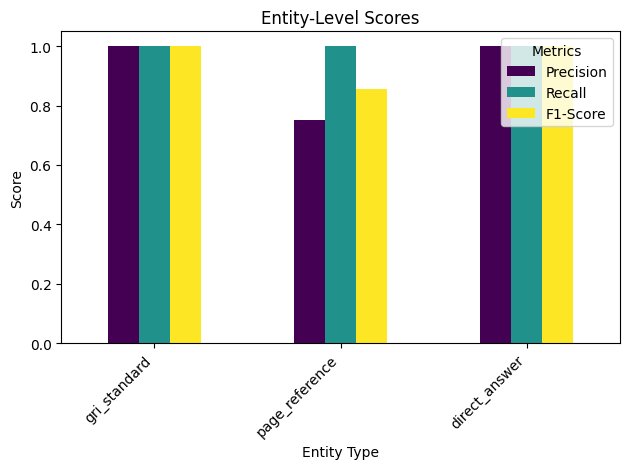

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to visualize entity-level scores
def plot_entity_scores(scores):
    # Prepare data for plotting
    ent_types = list(scores["ents_per_type"].keys())
    precision = [scores["ents_per_type"][ent]["p"] for ent in ent_types]
    recall = [scores["ents_per_type"][ent]["r"] for ent in ent_types]
    f1 = [scores["ents_per_type"][ent]["f"] for ent in ent_types]

    df_scores = pd.DataFrame({
        'Entity Type': ent_types,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # Plot
    plt.figure(figsize=(12, 6))
    df_scores.set_index('Entity Type').plot(kind='bar', colormap='viridis')
    plt.title('Entity-Level Scores')
    plt.xlabel('Entity Type')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metrics')
    plt.tight_layout()
    plt.show()

# Example scores (replace with actual scores from your evaluation)
scores = evaluate_model(nlp, EVAL_DATA)

# Plot entity-level scores
plot_entity_scores(scores)


## page_references ve direct_answer kullanmak için kaydet

In [30]:
# Sayıları depolamak için boş bir liste oluşturun
page_references = []
direct_answer = []

# Şimdi, NER modelini her işlenmiş satıra uygulayın
for line in processed_lines:
    doc = nlp(line)
    for ent in doc.ents:
        if ent.label_ == 'page_reference':
            # Sayıları listeye ekleyin
            page_references.append(ent.text)
        elif ent.label_ == 'direct_answer':
            direct_answer.append(ent.text)

# Sonuçları kontrol edin
print("Page References:", page_references)
print("\n")
print("Direct Answers:", direct_answer)


Page References: ['4', '30', '2  NaN', '50%        ', '2', '3', '4', '6', '10', '2', '14', '4', '16', '19', '20', '23                        50', '30', '26', '27                          0', '3', '2', '4', '6', '10', '14', '16', '19', '20                                      NaN', '14', '23                                      NaN', '24                                      NaN                      ', '26', '2', '3', '4', '6', '9                               75', '11', '50%         ', '14', '15', '16', '17', '20                              NaN', '21                              NaN', '23                              NaN', '24                              NaN', '26', '30', '2', '3', '4', '6', '9                     NaN        ', '11', '14', '15                    NaN', '16', '17', '18  Voluntary', '19', '20', '21                    75', '22                    NaN', '23                    50', '24                    NaN', '30', '26', '2', '40', '51', '2', '15', '2', '3', '4', '6', '20',

**Ekstra not:** Çıktıdaki DataFrame referansları, page_reference etiketli verilerin içinde geçerli olmayan veya hatalı değerler olduğunu gösteriyor. DataFrame'ler genellikle pandas ile ilgili veri yapıları olduğundan, DataFrame ifadesi burada hata veya yanılgı anlamına gelebilir.

**DataFrame'in Ortaya Çıkma Sebepleri:**

Yanlış Verilerin Listeye Eklenmesi: Verilerinizi işlediğiniz yerde DataFrame nesneleri yanlışlıkla listeye eklenmiş olabilir.
Veri Kaynağında Sorun: Eğer verilerinizden bazıları DataFrame nesneleri içeriyorsa, bu veriler doğru şekilde işlenmemiş olabilir.

**Çözüm İçin Adımlar:**

Veri Kaynağını Kontrol Etme: page_references listesine nasıl veri eklediğinizi gözden geçirin ve DataFrame nesnelerinin listeye eklenip eklenmediğini kontrol edin.

Hatalı Verileri Temizleme: DataFrame nesnelerini listeye eklemeden önce temizleyici bir iş akışı oluşturun.

Veri Formatını Kontrol Etme: page_references listesindeki öğelerin doğru formatta olup olmadığını kontrol edin ve DataFrame nesnelerini içermediğinden emin olun.

# Adım 4: page reference a göre page text yazdırma ve direct answer  yazdırma

In [31]:
import numpy as np
import re
import fitz  # PyMuPDF


# Helper function to check if a string is a valid number
def is_valid_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# Process direct answers
def process_direct_answers(direct_answers):
    processed_direct_answer = [item for item in direct_answers if item and item != 'NaN' and item != ' ']
    print(f"Direct Answers: \n")
    for answer in processed_direct_answer:
        print(f"* {answer}\n")

# Process page references
def process_page_references(page_refs):
    processed_page_ref = []
    for reference in page_refs:
        reference = reference.replace("–", "-").strip()
        if '-' in reference:
            parts = reference.split('-')
            if len(parts) == 2 and all(is_valid_number(part) for part in parts):
                start, end = map(int, parts)
                if start <= end:
                    processed_page_ref.extend(range(start, end + 1))
                else:
                    print(f"Başlangıç sayısı bitiş sayısından büyük: {reference}")
            else:
                print(f"Geçersiz aralık formatı: {reference}")
        elif is_valid_number(reference):
            processed_page_ref.append(int(reference))
        else:
            print(f"Geçersiz referans: {reference}")
    processed_page_ref = sorted(set(processed_page_ref))
    print("\n\n" + "-"*50 + "\n\n")
    print("Page References:\n")
    print(f"{processed_page_ref}")
    return processed_page_ref

# Extract and print pages from PDF
def extract_and_print_pages(pdf_path, page_numbers):
    print("The Texts on PDF's Reference Pages: \n\n")
    pdf_document = fitz.open(pdf_path)
    for page_number in page_numbers:
        actual_page_number = page_number + 2 # +2 meaning: cover page + content table page
        if actual_page_number < 1 or actual_page_number > len(pdf_document):
            print(f"Geçersiz sayfa numarası: {page_number}")
            continue
        page = pdf_document.load_page(actual_page_number - 1)
        text = page.get_text()
        print(f"--- Sayfa {page_number} (Gerçek Sayfa {actual_page_number}) ---")
        print(text)
        print("\n" + "="*40 + "\n")
    pdf_document.close()

# Main logic
pdf_path = "/content/350641_1.pdf"  # PDF dosyasının yolunu buraya girin

if direct_answer and page_references:
    process_direct_answers(direct_answer)
    processed_page_ref = process_page_references(page_references)
    print("\n\n" + "-"*50 + "\n\n")
    extract_and_print_pages(pdf_path, processed_page_ref)
elif direct_answer:
    process_direct_answers(direct_answer)
elif page_references:
    processed_page_ref = process_page_references(page_references)
    extract_and_print_pages(pdf_path, processed_page_ref)


Direct Answers: 

* Gap20        NaN            

* 3        NaN            NaN

* 3                                    Female                      

* 100%         NaN         

* Social and

* Environmental Compliance

* Environmental Assessment

* Social Assessment

* Marketing and Labelling

* Social and

* Social and

* 3                          Introduction  

* Environmental Capital (

* Social and

* Environmental Capital (

* Social and

* Social and

* Message (pg         

* Environmental Capital (

* Social and

* Environmental Capital (

* Social and

* Remarks  

* Reporting period

* Reporting cycle

* Environmental Capital

* Environmental Capital (

* Environmental Capital (

* Environmental Capital (

* Environmental Capital (

* Environmental Capital (

* Environmental Capital (

* Environmental Capital (

* Environmental Capital (

* Environmental Capital (

* Environmental Capital (

* Environmental Capital (

* Environmental Capital (

* Environmental Capital (



# Adım 5: çıktıyı txt dosyasına kaydet

In [32]:
import numpy as np
import re
import fitz  # PyMuPDF

# Helper function to check if a string is a valid number
def is_valid_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

# Process direct answers
def process_direct_answers(direct_answers, output_file):
    with open(output_file, 'a') as file:
        processed_direct_answer = [item for item in direct_answers if item and item != 'NaN' and item != ' ']
        file.write(f"Direct Answers: \n")
        for answer in processed_direct_answer:
            file.write(f"* {answer}\n")

# Process page references
def process_page_references(page_refs, output_file):
    with open(output_file, 'a') as file:
        processed_page_ref = []
        for reference in page_refs:
            reference = reference.replace("–", "-").strip()
            if '-' in reference:
                parts = reference.split('-')
                if len(parts) == 2 and all(is_valid_number(part) for part in parts):
                    start, end = map(int, parts)
                    if start <= end:
                        processed_page_ref.extend(range(start, end + 1))
                    else:
                        file.write(f"Başlangıç sayısı bitiş sayısından büyük: {reference}\n")
                else:
                    file.write(f"Geçersiz aralık formatı: {reference}\n")
            elif is_valid_number(reference):
                processed_page_ref.append(int(reference))
            else:
                file.write(f"Geçersiz referans: {reference}\n")
        processed_page_ref = sorted(set(processed_page_ref))
        file.write("\n\n" + "-"*50 + "\n\n")
        file.write("Page References:\n")
        file.write(f"{processed_page_ref}")
        return processed_page_ref

# Extract and print pages from PDF
def extract_and_print_pages(pdf_path, page_numbers, output_file):
    pdf_document = fitz.open(pdf_path)
    with open(output_file, 'a') as file:
        file.write("The Texts on PDF's Reference Pages: \n\n")
        for page_number in page_numbers:
            actual_page_number = page_number + 2
            if actual_page_number < 1 or actual_page_number > len(pdf_document):
                file.write(f"Geçersiz sayfa numarası: {page_number}\n")
                continue
            page = pdf_document.load_page(actual_page_number - 1)
            text = page.get_text()
            file.write(f"--- Sayfa {page_number} (Gerçek Sayfa {actual_page_number}) ---\n")
            file.write(text + "\n")
            file.write("\n" + "="*40 + "\n")
    pdf_document.close()

# Main logic
pdf_path = "/content/350641_1.pdf"  # PDF dosyasının yolunu buraya girin
output_file = "output.txt"

# Clear the output file before writing
open(output_file, 'w').close()

if direct_answer and page_references:
    process_direct_answers(direct_answer, output_file)
    processed_page_ref = process_page_references(page_references, output_file)
    with open(output_file, 'a') as file:
      file.write("\n\n" + "-"*50 + "\n\n")
    extract_and_print_pages(pdf_path, processed_page_ref, output_file)
elif direct_answer:
    process_direct_answers(direct_answer, output_file)
elif page_references:
    processed_page_ref = process_page_references(page_references, output_file)
    extract_and_print_pages(pdf_path, processed_page_ref, output_file)
